# Project IART - 2023

This project consists of supervised learning with the following steps:
- 0. Data collection
- 1. Dataset analysis
- 2. Definition of the training and test sets
- 3. Selection, Parameterization and Evaluation of the learning classification algorithms
  - 3.1. Decision Trees
  - 3.2. Neural Networks
  - 3.3. K-NN
  - 3.4. SVM

## 0. Dataset

The dataset used in this project is the [Cancer Dataset](https://www.kaggle.com/datasets/erdemtaha/cancer-data).

The dataset contains 569 instances and 32 attributes. The class distribution is 212 Malignant and 357 Benign.

The dataset is composed of 30 attributes, 10 of them are real and the rest are integers. The attributes are:

The dataset contains 30 attributes, which are as follows:

-   **diagnosis**: This is the target variable (label) and represents the diagnosis of the breast cancer (M=malignant, B=benign).
-   **radius_mean**: This is the mean of distances from the center of the nucleus to points on the perimeter of the tumor.
-   **texture_mean**: This is the standard deviation of gray-scale values in the image.
-   **perimeter_mean**: This is the mean size of the core tumor.
-   **area_mean**: This is the mean area of the tumor.
-   **smoothness_mean**: This is the mean of local variation in radius lengths.
-   **compactness_mean**: This is the mean of perimeter^2 / area - 1.0.
-   **concavity_mean**: This is the mean of severity of concave portions of the contour.
-   **concave points_mean**: This is the mean for number of concave portions of the contour.
-   **symmetry_mean**: This is the mean symmetry of the cell nuclei.
-   **fractal_dimension_mean**: This is the mean fractal dimension of the cell nuclei.
-   **radius_se**: This is the standard error of distances from the center of the nucleus to points on the perimeter of the tumor.
-   **texture_se**: This is the standard error of gray-scale values in the image.
-   **perimeter_se**: This is the standard error of the size of the core tumor.
-   **area_se**: This is the standard error of the area of the tumor.
-   **smoothness_se**: This is the standard error of local variation in radius lengths.
-   **compactness_se**: This is the standard error of perimeter^2 / area - 1.0.
-   **concavity_se**: This is the standard error of severity of concave portions of the contour.
-   **concave points_se**: This is the standard error for number of concave portions of the conour.
-   **symmetry_se**: This is the standard error of symmetry of the cell nuclei.
-   **fractal_dimension_se**: This is the standard error of fractal dimension of the cell nuclei.
-   **radius_worst**: This is the worst or largest mean of distances from the center of the nucleus to points on the perimeter of the tumor.
-   **texture_worst**: This is the worst or largest standard deviation of gray-scale values in the image.
-   **perimeter_worst**: This is the worst or largest size of the core tumor.
-   **area_worst**: This is the worst or largest area of the tumor.
-   **smoothness_worst**: This is the worst or largest local variation in radius lengths.
-   **compactness_worst**: This is the worst or largest perimeter^2 / area - 1.0.
-   **concavity_worst**: This is the worst or largest severity of concave portions of the contour.
-   **concave points_worst**: This is the worst or largest number of concave portions of the contour.
-   **symmetry_worst**: This is the worst or largest symmetry of the cell nuclei.
-   **fractal_dimension_worst**: This is the worst or largest fractal dimension of the cell nuclei.


## 1. Dataset analysis

### 1.1. Importing the libraries

In [1]:
import pandas
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.tree as tree


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### 1.2. Importing the dataset

In [2]:
# Load the data
df = pandas.read_csv("dataset.csv")

# Drop uneeded columns
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Print the first 5 rows of the data
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0         M        17.99         10.38          122.80     1001.0  \
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.11840           0.27760          0.3001              0.14710  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst   
0         0.2419  ...         25.38          17.33           184.60  \
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst   
0      2019.0            0.1622             0.6656           0.7119  \
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

### 1.3 Data First Look

In [3]:
# Print the number of rows and columns in the data
print( f'Rows: {df.shape[0]} \nColumns: {df.shape[1]}\n')


# Print the percentage of benign and malignant cases
print(f'Benign: {round(df["diagnosis"].value_counts()[0] / len(df) * 100, 2)}% \nMalignant: {round(df["diagnosis"].value_counts()[1] / len(df) * 100, 2)}%')

df.describe()

Rows: 569 
Columns: 31

Benign: 62.74% 
Malignant: 37.26%


radius_mean  texture_mean  perimeter_mean    area_mean   
count   569.000000    569.000000      569.000000   569.000000  \
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst   
count     569.000000              569.000000  ...    569.000000  \
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst   
count     569.000000       569.000000   569.000000        569.000000  \
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst   
count         569.000000       569.000000            569.000000  \
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Let's take a look at the data using a violin plot.

<Figure size 3000x3000 with 0 Axes>

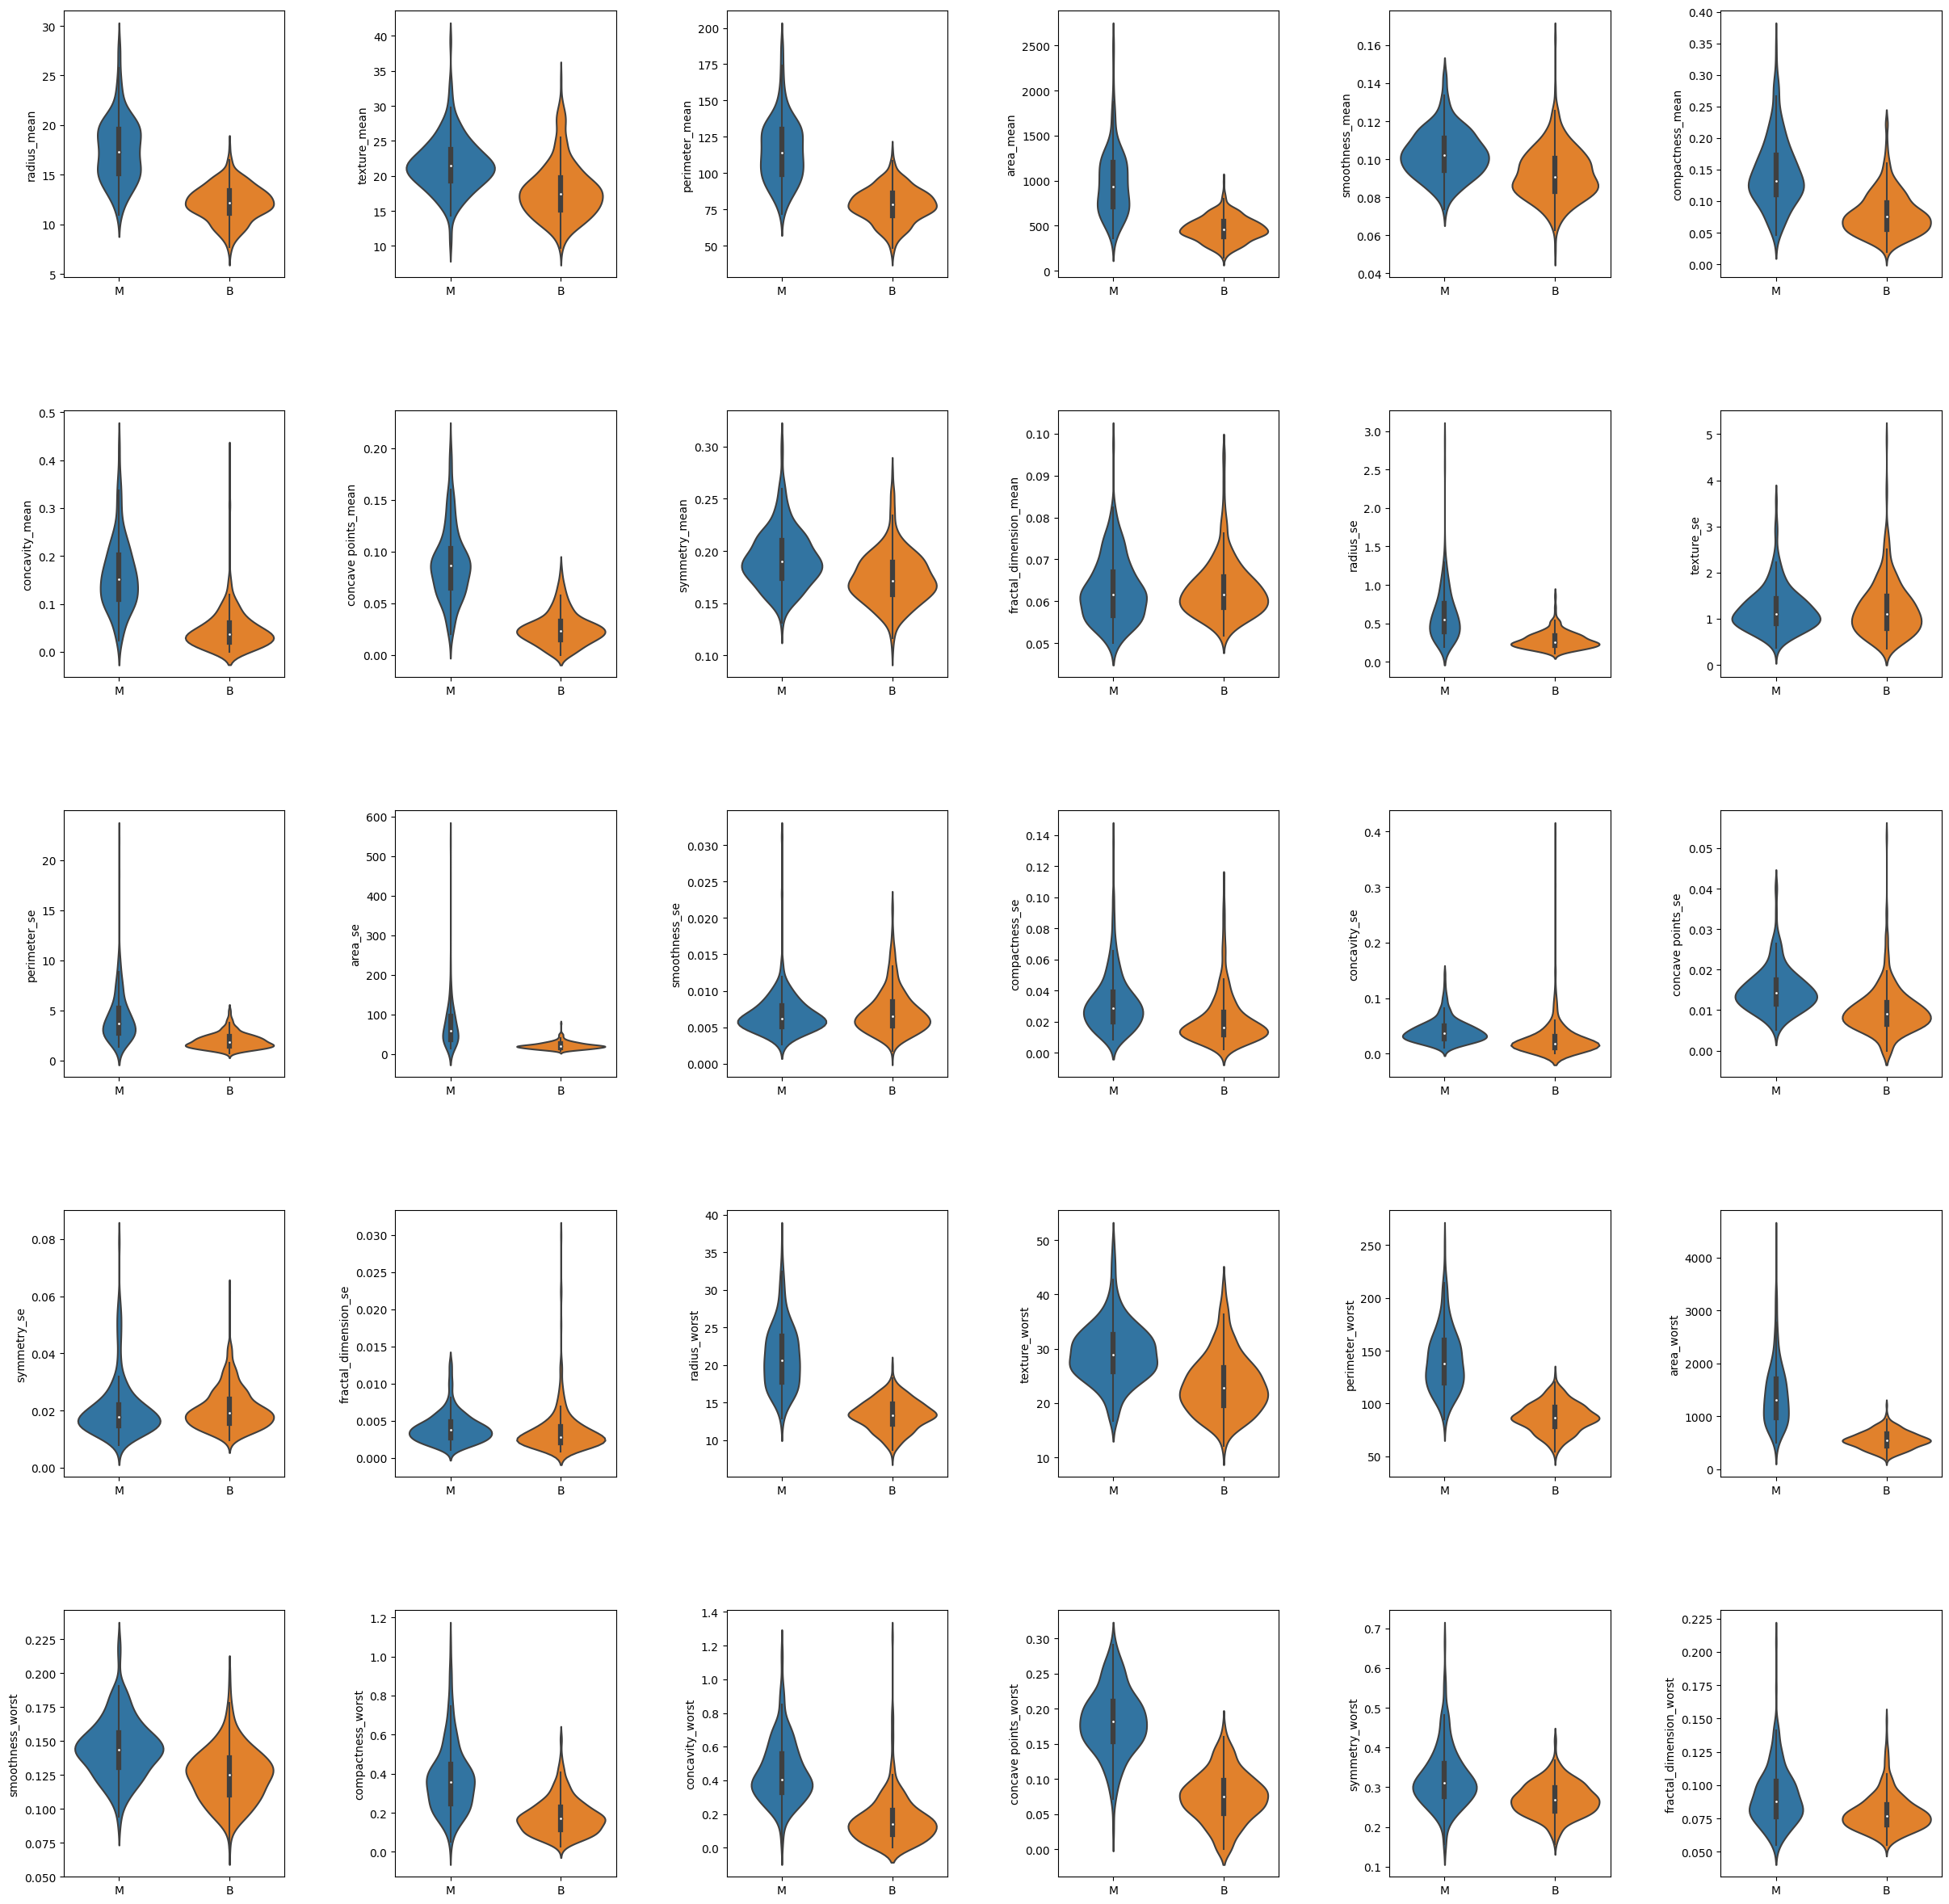

In [4]:
 # Make a violin plot for all the features
def violin_plt():
    plt.figure(figsize=(30, 30))

    fig, axs = plt.subplots(5, 6, figsize=(30, 30))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for column_index, column in enumerate(df.columns):
        if column == 'diagnosis':
            continue
        column_index -= 1
        sb.violinplot(x='diagnosis', y=column, data=df, ax=axs[column_index//6, column_index%6])
        axs[column_index//6, column_index%6].set_xlabel('')
        axs[column_index//6, column_index%6].set_ylabel(column)


    plt.show()

violin_plt()

The violin plot shows the distribution of the data in each class. The black dot represents the mean of the data. The width of the violin represents the standard deviation of the data. The box represents the interquartile range of the data. The whiskers represent the minimum and maximum values of the data.

There are some outliers in the data that can be seen in the extremes of the plots. We'll take care of them later.

### 1.4 Data preprocessing

In [5]:
# See number of Null + NaN + Duplicates
df.isnull().sum().sum() + df.isna().sum().sum() + df.duplicated().sum()

0

#### 1.4.1. Removing outliers

There are no missing or duplicate values in the dataset. However, there are some outliers in the data. Let's treat them.

In [6]:
# Threshold value to define the range for identifying outliers
threshold = 3  # bigger the value, more the outliers are permitted

# Loop through all columns in the DataFrame, excluding the diagnosis
for column in df.loc[:, ~df.columns.isin(['diagnosis'])]:

    # Mean and STD of the column
    mean = df[column].mean()
    std = df[column].std()

    # Lower and Upper limits
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std

    # Remove outliers
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]


Rows: 427 
Columns: 31

Removed 24.96% of the data


<Figure size 3000x3000 with 0 Axes>

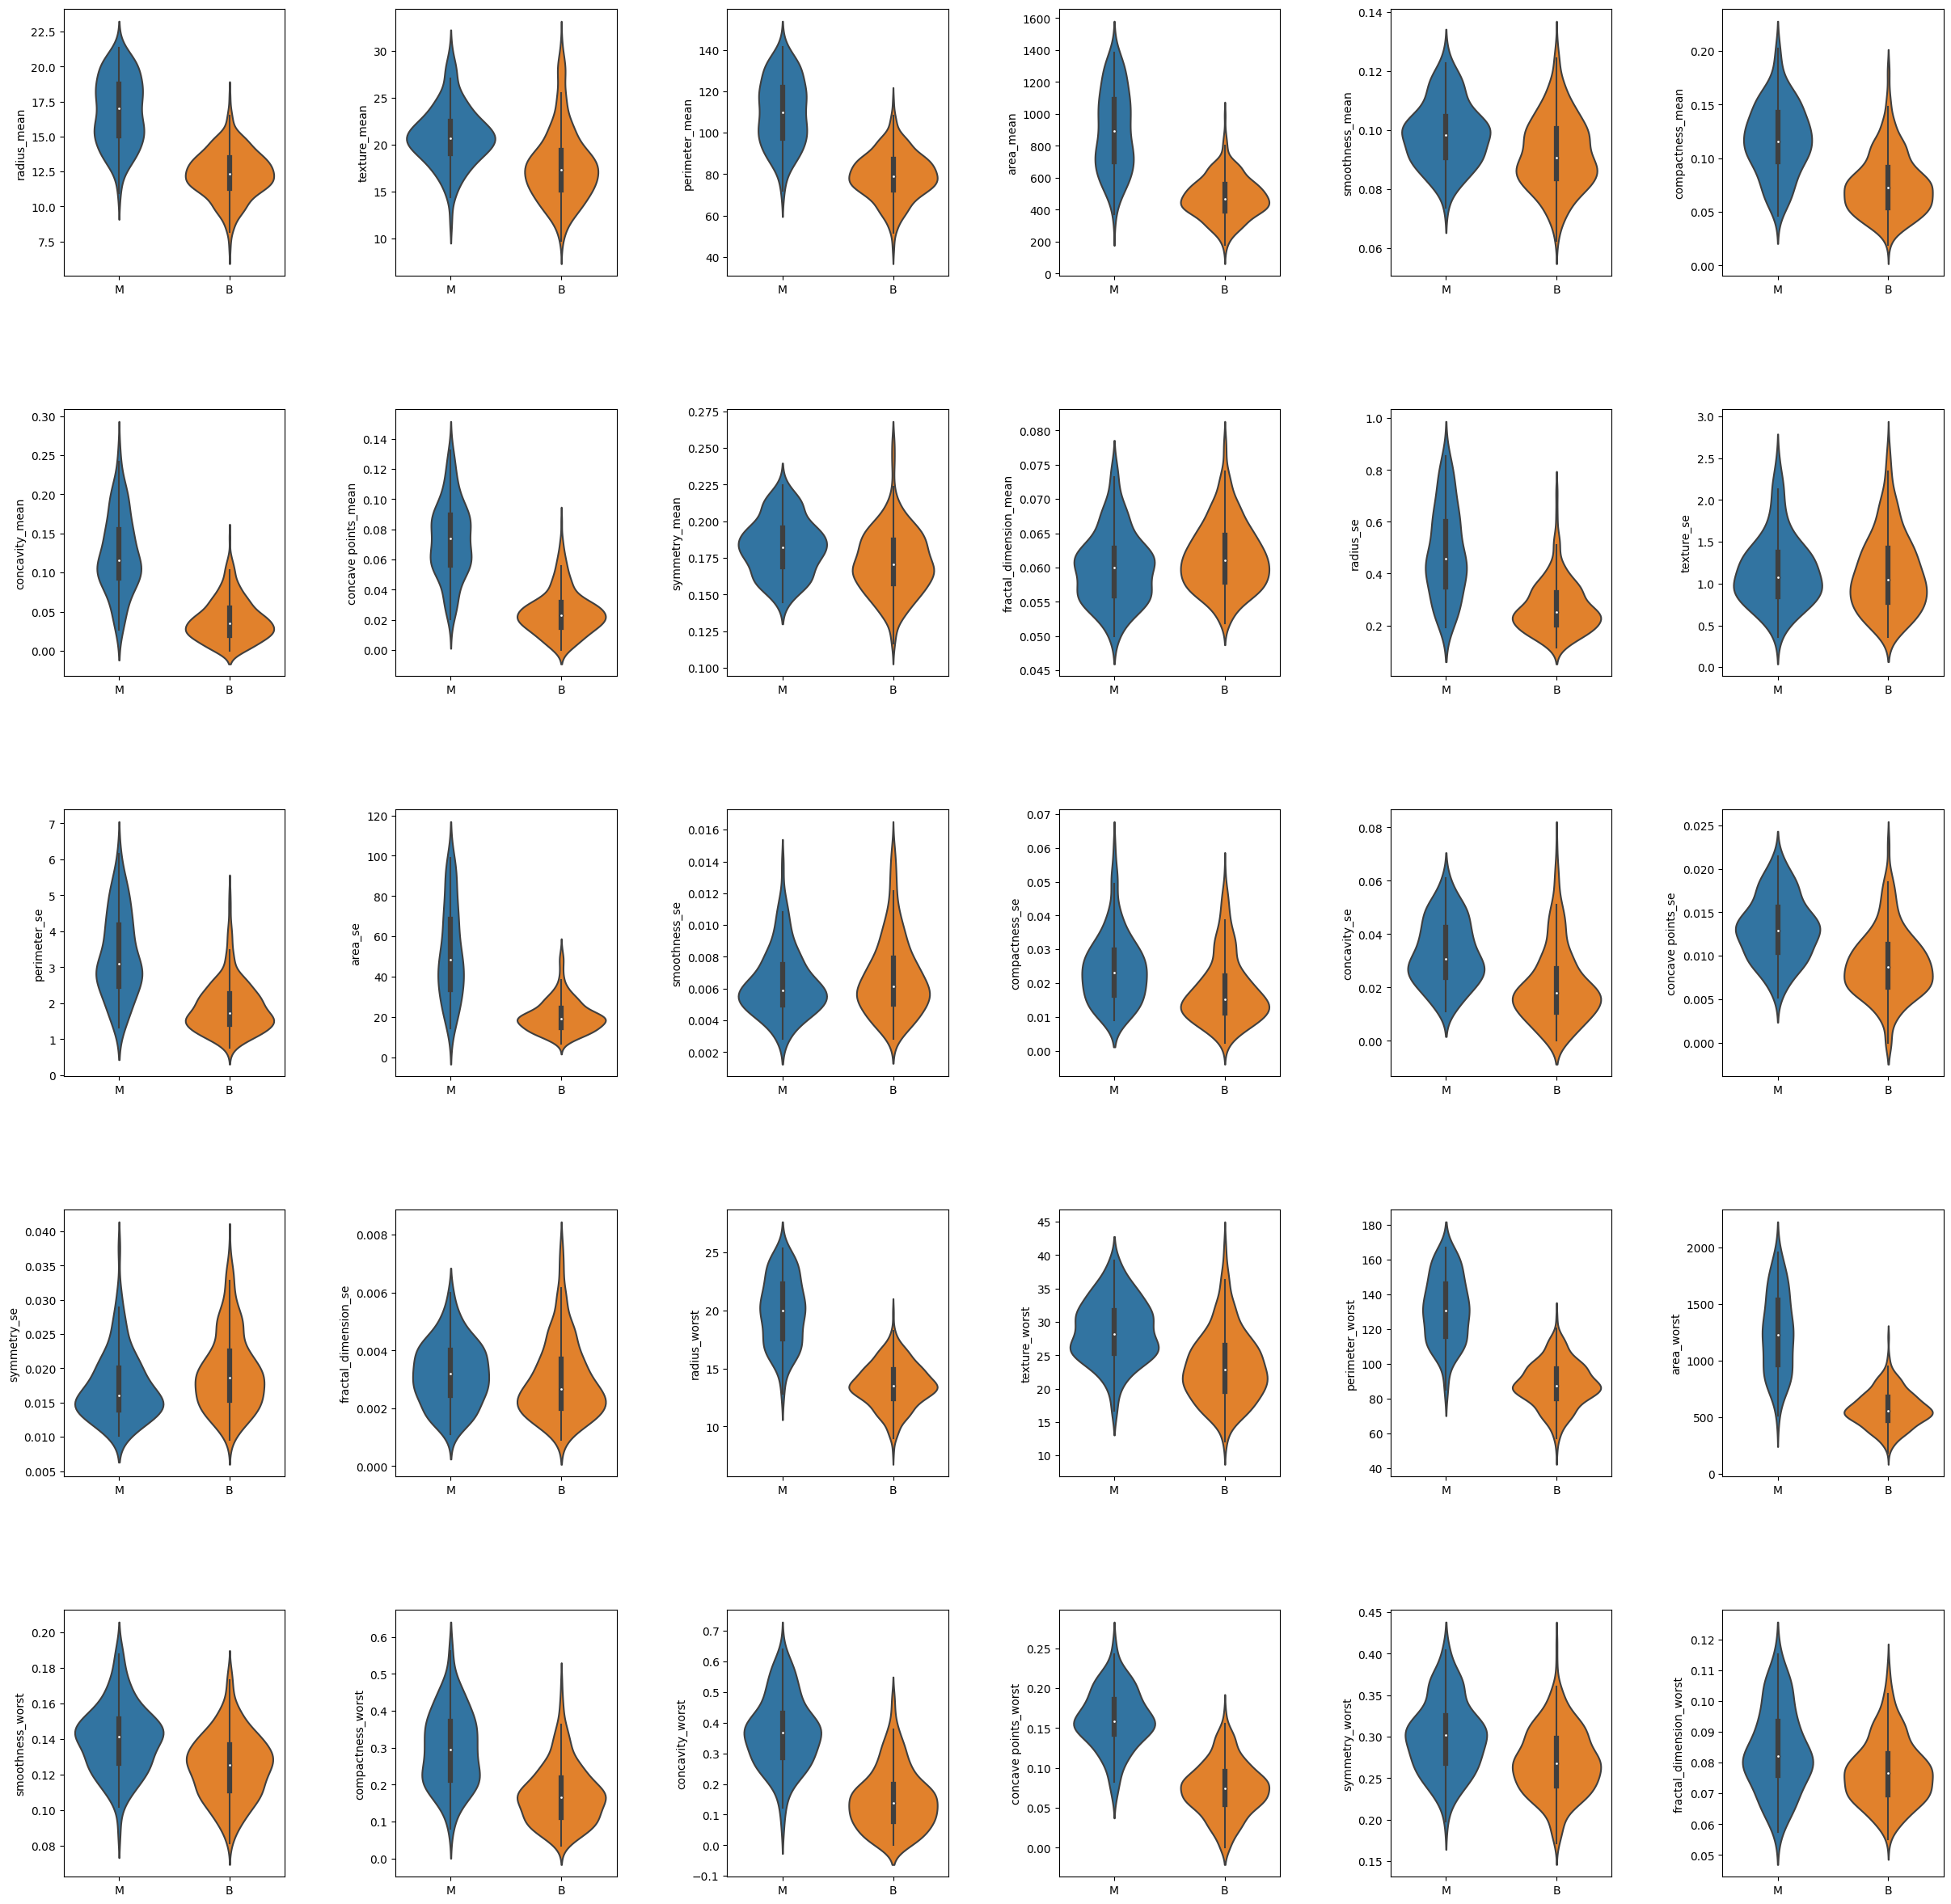

In [7]:
# Lets see the number of rows and columns after removing outliers
print( f'Rows: {df.shape[0]} \nColumns: {df.shape[1]}\n')
print(f'Removed {round((569 - df.shape[0]) / 569 * 100, 2)}% of the data')
violin_plt()

Now the data is free of outliers and the violin plots look much better.
We can see that the data is more balanced now.

In [8]:
# Save the cleaned dataset
df.to_csv('dataset_clean.csv', index=False)

We can now proceed to the next step: **Data Analysis**.

### 1.5. Data Analysis

Now that we have clean data, let's investigate further.

In [9]:
df = pandas.read_csv("dataset_clean.csv", index_col=None)

df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0         M        20.57         17.77           132.9     1326.0  \
1         M        19.69         21.25           130.0     1203.0   
2         M        20.29         14.34           135.1     1297.0   
3         M        18.25         19.98           119.6     1040.0   
4         M        13.71         20.83            90.2      577.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
0          0.08474           0.07864         0.08690              0.07017  \
1          0.10960           0.15990         0.19740              0.12790   
2          0.10030           0.13280         0.19800              0.10430   
3          0.09463           0.10900         0.11270              0.07400   
4          0.11890           0.16450         0.09366              0.05985   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst   
0         0.1812  ...         24.99          23.41            158.8  \
1         0.2069  ...         23.57          25.53            152.5   
2         0.1809  ...         22.54          16.67            152.2   
3         0.1794  ...         22.88          27.66            153.2   
4         0.2196  ...         17.06          28.14            110.6   

   area_worst  smoothness_worst  compactness_worst  concavity_worst   
0      1956.0            0.1238             0.1866           0.2416  \
1      1709.0            0.1444             0.4245           0.4504   
2      1575.0            0.1374             0.2050           0.4000   
3      1606.0            0.1442             0.2576           0.3784   
4       897.0            0.1654             0.3682           0.2678   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.1860          0.2750                  0.08902  
1                0.2430          0.3613                  0.08758  
2                0.1625          0.2364                  0.07678  
3                0.1932          0.3063                  0.08368  
4                0.1556          0.3196                  0.11510  

[5 rows x 31 columns]

#### 1.5.1. Attribute Histograms

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\ricar\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ricar\AppData\Local\Temp\ipykernel_19696\1436590364.py", line 1, in <module>
    df.hist(figsize=(20, 20), color='blue', edgecolor='black', alpha=0.4, bins=10, grid=False);
  File "c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_core.py", line 223, in hist_frame
    return plot_backend.hist_frame(
  File "c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\hist.py", line 518, in hist_frame
    fig, axes = create_subplots(
  File "c:\Users\ricar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py", line 300, in create_subplots
    handle_shared_axes(axarr, nplots, naxes, nrows, ncols, sharex, sharey)
  File "c:\Users\ricar\AppDat

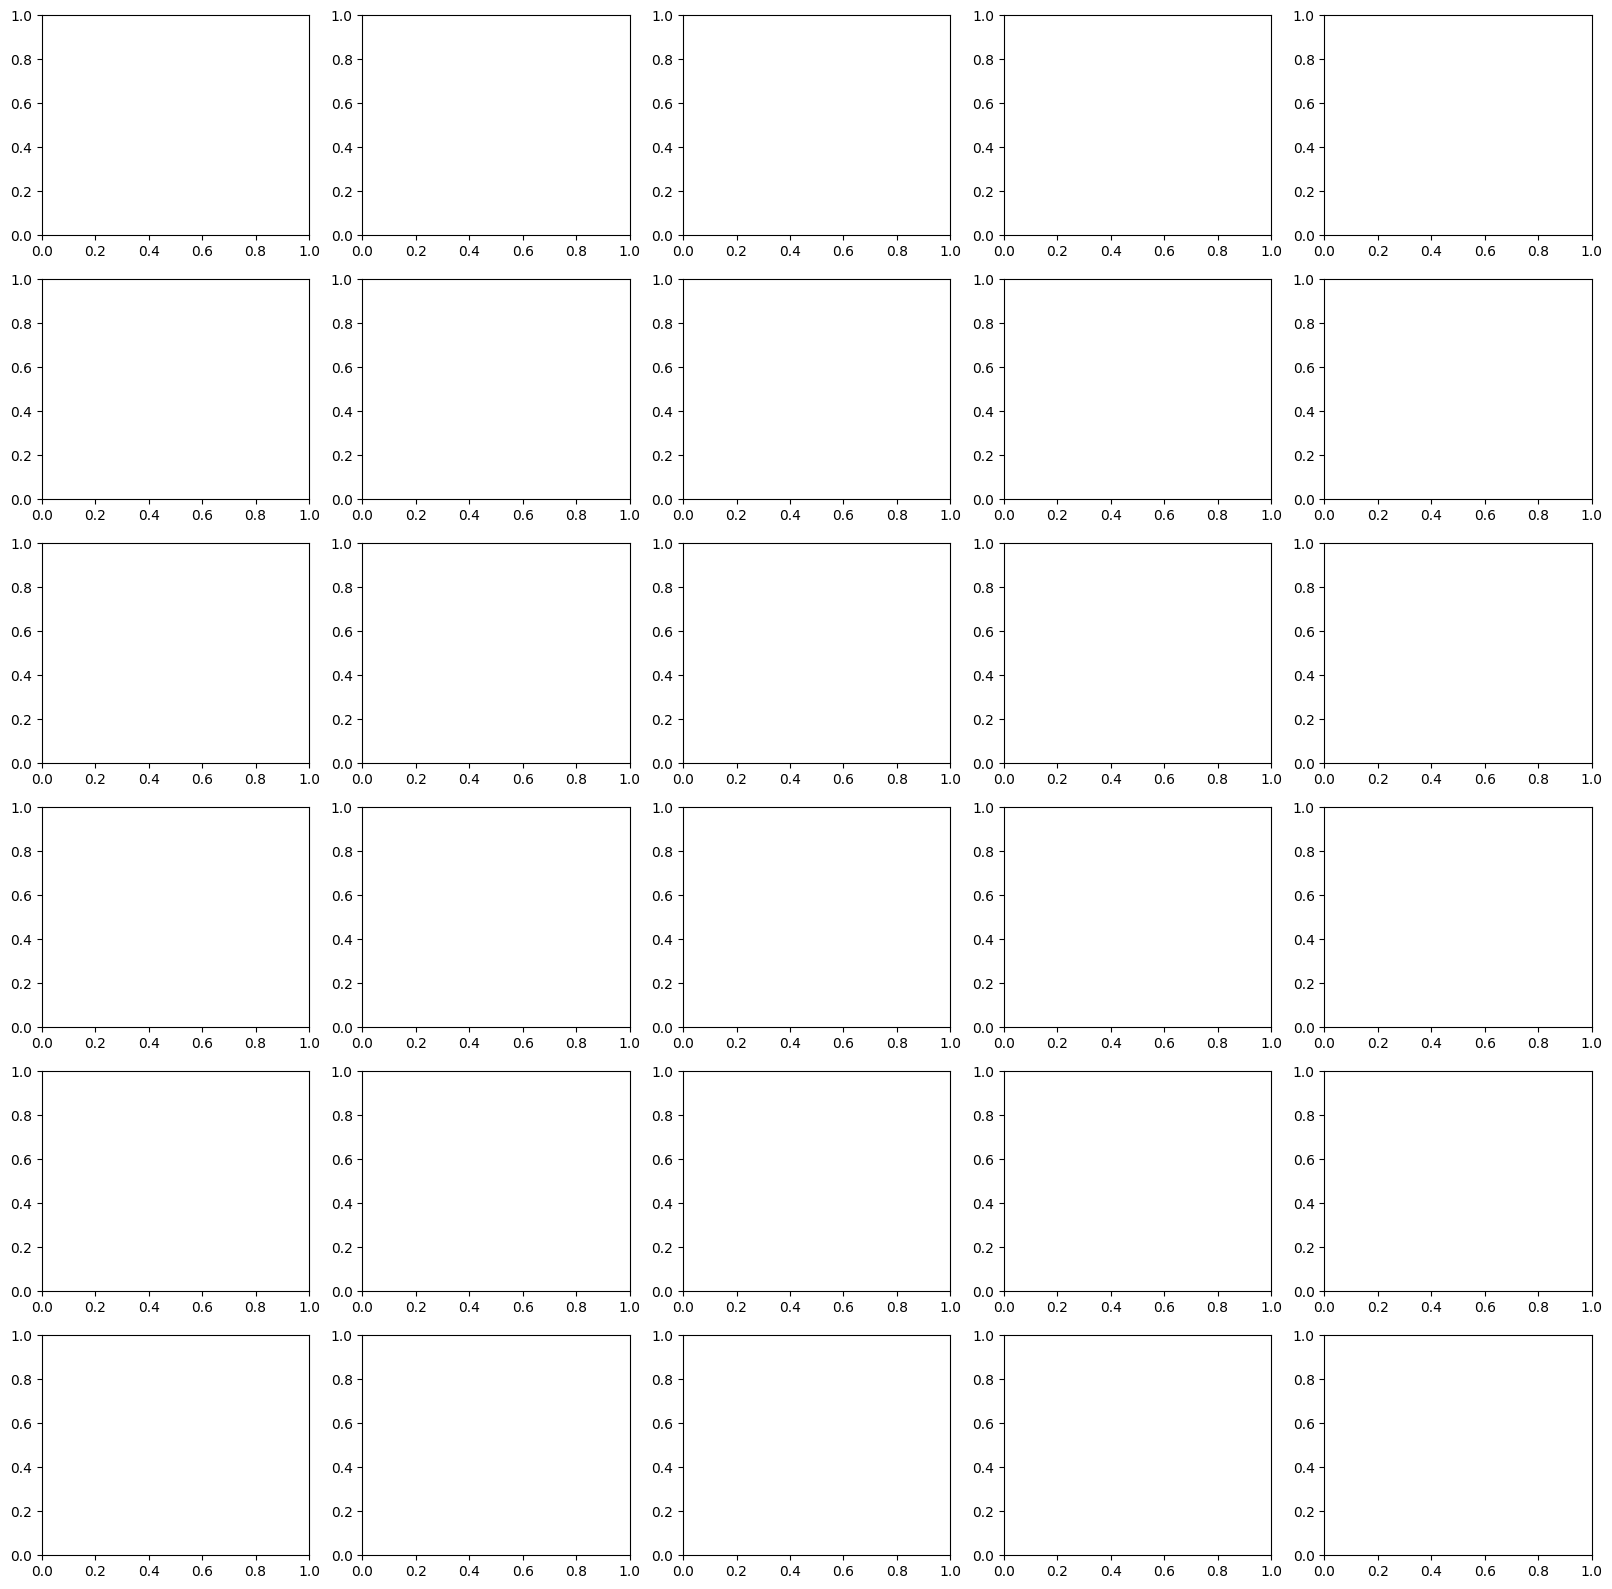

In [10]:
df.hist(figsize=(20, 20), color='blue', edgecolor='black', alpha=0.4, bins=10, grid=False);

The values seem to be normally distributed. This is good because it means that the data is not skewed.

#### 1.5.2. Correlation matrix

Let's take a look at the correlation between the attributes.

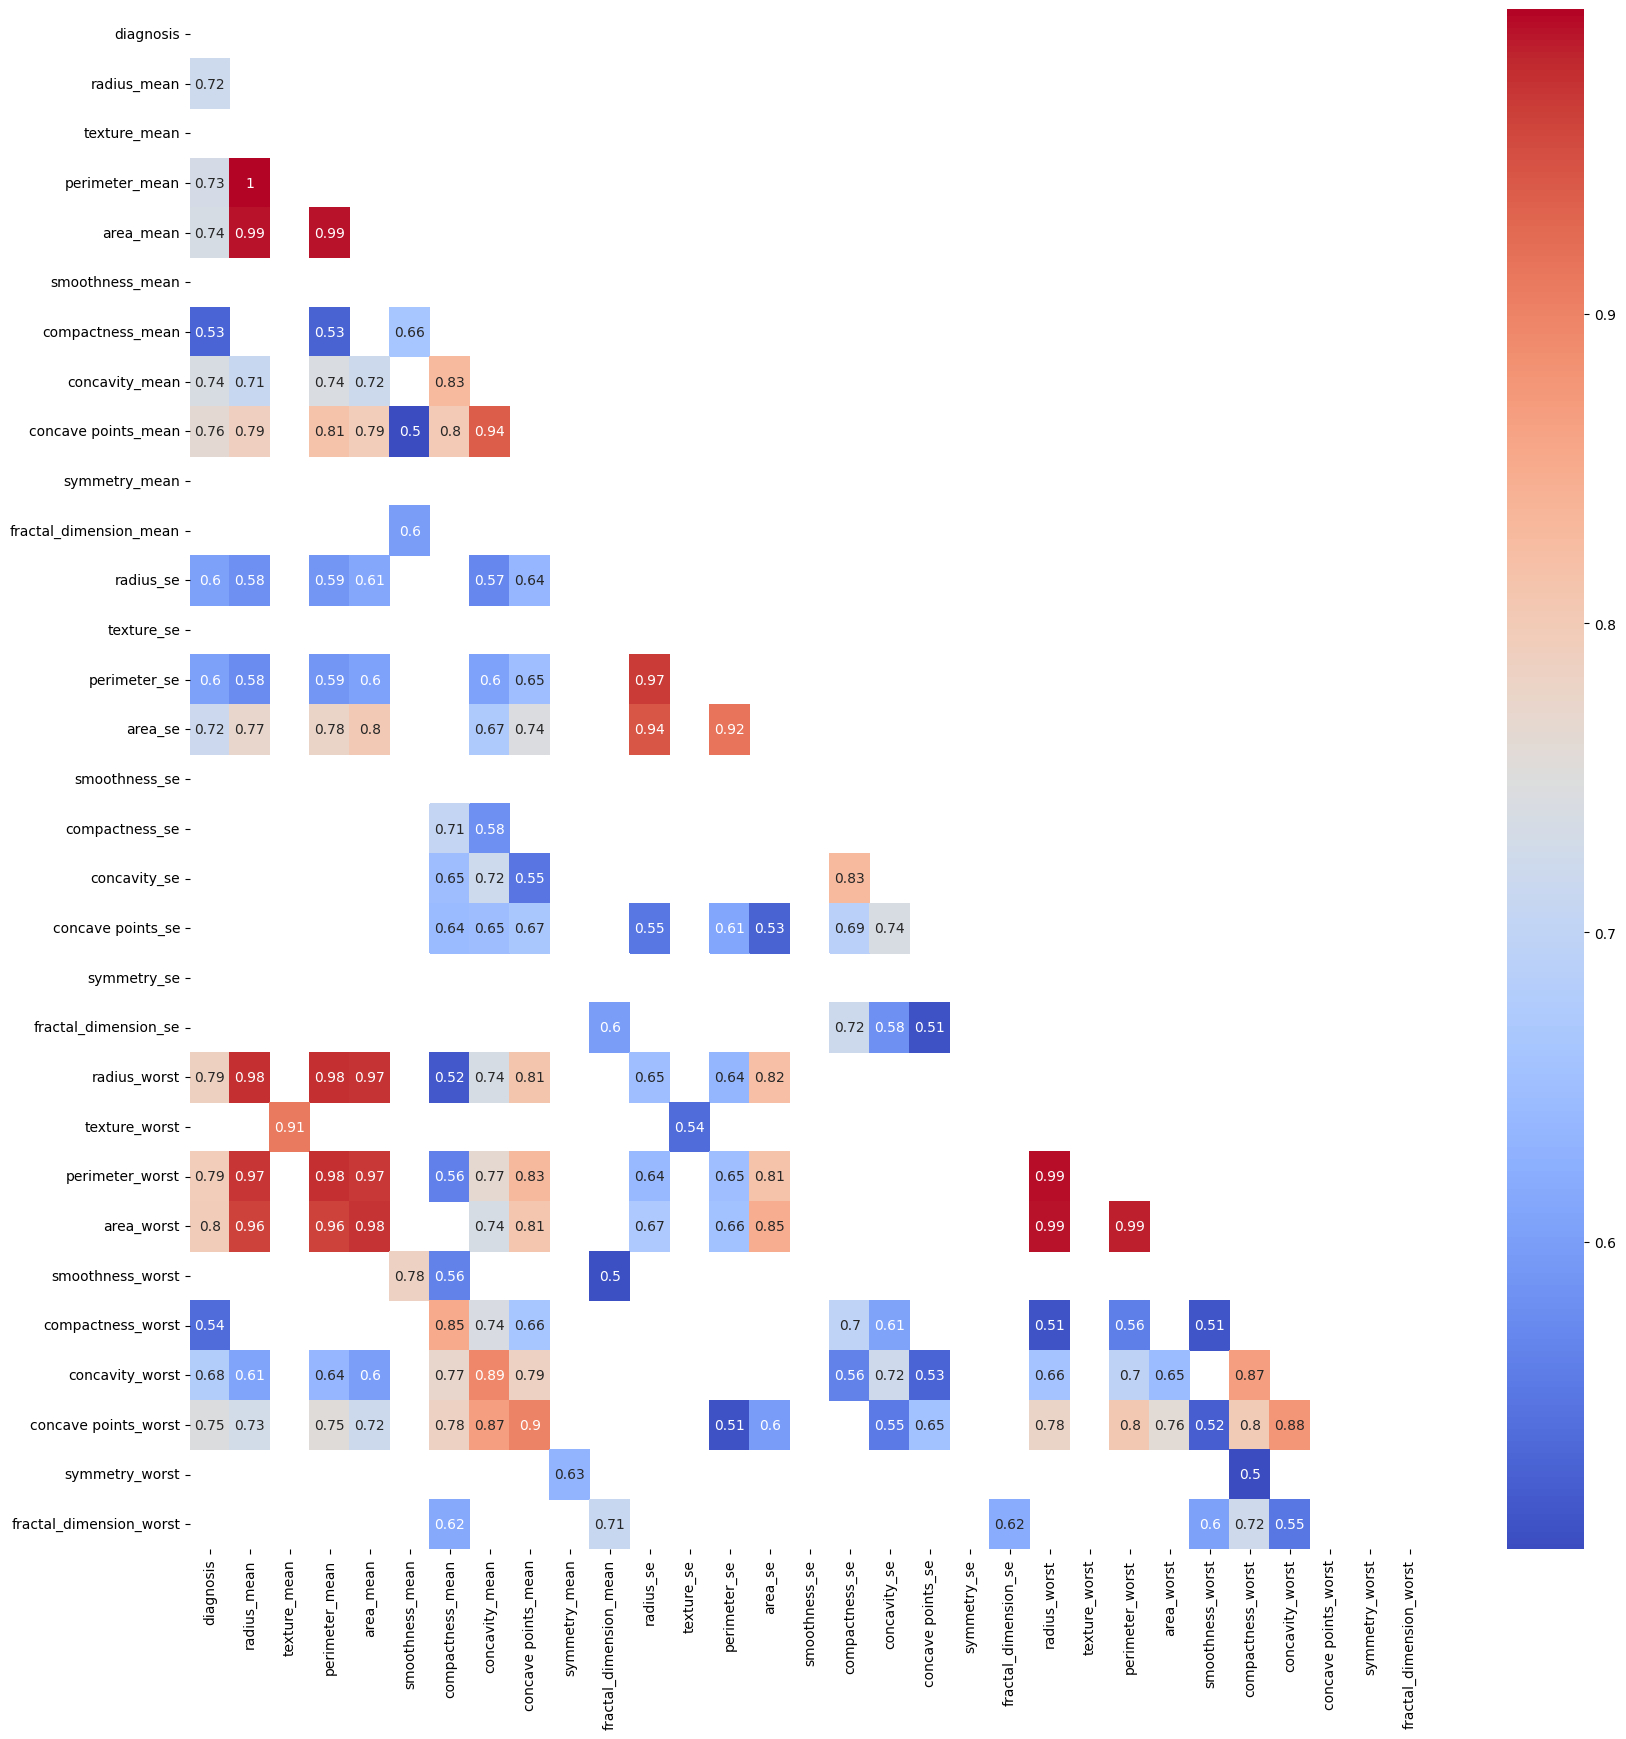

In [11]:
# calculate the correlation between each pair of columns
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1}) # Swapping B and M for 0 and 1
corr_matrix = df.corr()

# Select only the columns with a correlation greater than 0.5 or less than -0.5
corr_matrix = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot onlly the lower triangle of the correlation matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 20))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, mask=mask)
plt.show()


df['diagnosis'] = df['diagnosis'].map({0 : 'B', 1 : 'M'}) # Swapping Back

The correlation matrix shows that there are some attributes that are highly correlated. This means that we can remove some of them without losing much information. We'll do that later.
Let's take a look at the correlation between the attributes and the target variable.

##### 1.5.2.1 Correlation between attributes and target variable

In [12]:
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1}) # Swapping B and M for 0 and 1

# get the correlation between the diagnosis and each column
corr_matrix = df.corr()
print(corr_matrix['diagnosis'].sort_values(ascending=False))

df['diagnosis'] = df['diagnosis'].map({0 : 'B', 1 : 'M'}) # Swapping Back

diagnosis                  1.000000
area_worst                 0.796420
perimeter_worst            0.794675
radius_worst               0.787448
concave points_mean        0.764965
concave points_worst       0.746309
concavity_mean             0.739208
area_mean                  0.737194
perimeter_mean             0.733080
radius_mean                0.721529
area_se                    0.717007
concavity_worst            0.681057
radius_se                  0.603491
perimeter_se               0.602184
compactness_worst          0.535839
compactness_mean           0.528411
concave points_se          0.420743
texture_worst              0.416089
concavity_se               0.382714
texture_mean               0.357771
smoothness_worst           0.345563
symmetry_worst             0.313028
compactness_se             0.265689
fractal_dimension_worst    0.250812
smoothness_mean            0.244806
symmetry_mean              0.215077
fractal_dimension_se       0.077631
texture_se                 0

Ok, so there are some attributes that are highly correlated with the target variable and others that aren't. Let's take a look at them and see if we can remove some of them.

#### 1.5.3. Most valuable attributes (RFE - Recursive Feature Elimination)


With RFE we can see which attributes are the most important. We can then think about removing the less important ones.

In [13]:
from sklearn.feature_selection import RFE

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

df = pandas.read_csv("dataset_clean.csv", index_col=None)

df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1}) # Swapping B and M for 0 and 1

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Create the RFE object and rank each pixel
rfe = RFE(estimator=clf, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get the feature importances
feature_importances = rfe.ranking_

best_features = []

# Print the name of the most important features
for index, feature in enumerate(feature_importances):
    if feature == 1:
        print(X.columns[index])
        best_features.append(X.columns[index])


texture_mean
concavity_mean
area_se
smoothness_se
radius_worst
texture_worst
perimeter_worst
smoothness_worst
concave points_worst
symmetry_worst


So, these 10 attributes are the most important ones. We'll use them in the next step.

In [14]:
df = pandas.read_csv("dataset_clean.csv", index_col=None)

#### 1.5.4. Attribute Pairplots

We aleady saw the violin plots, let's now take a look at the pairplots.

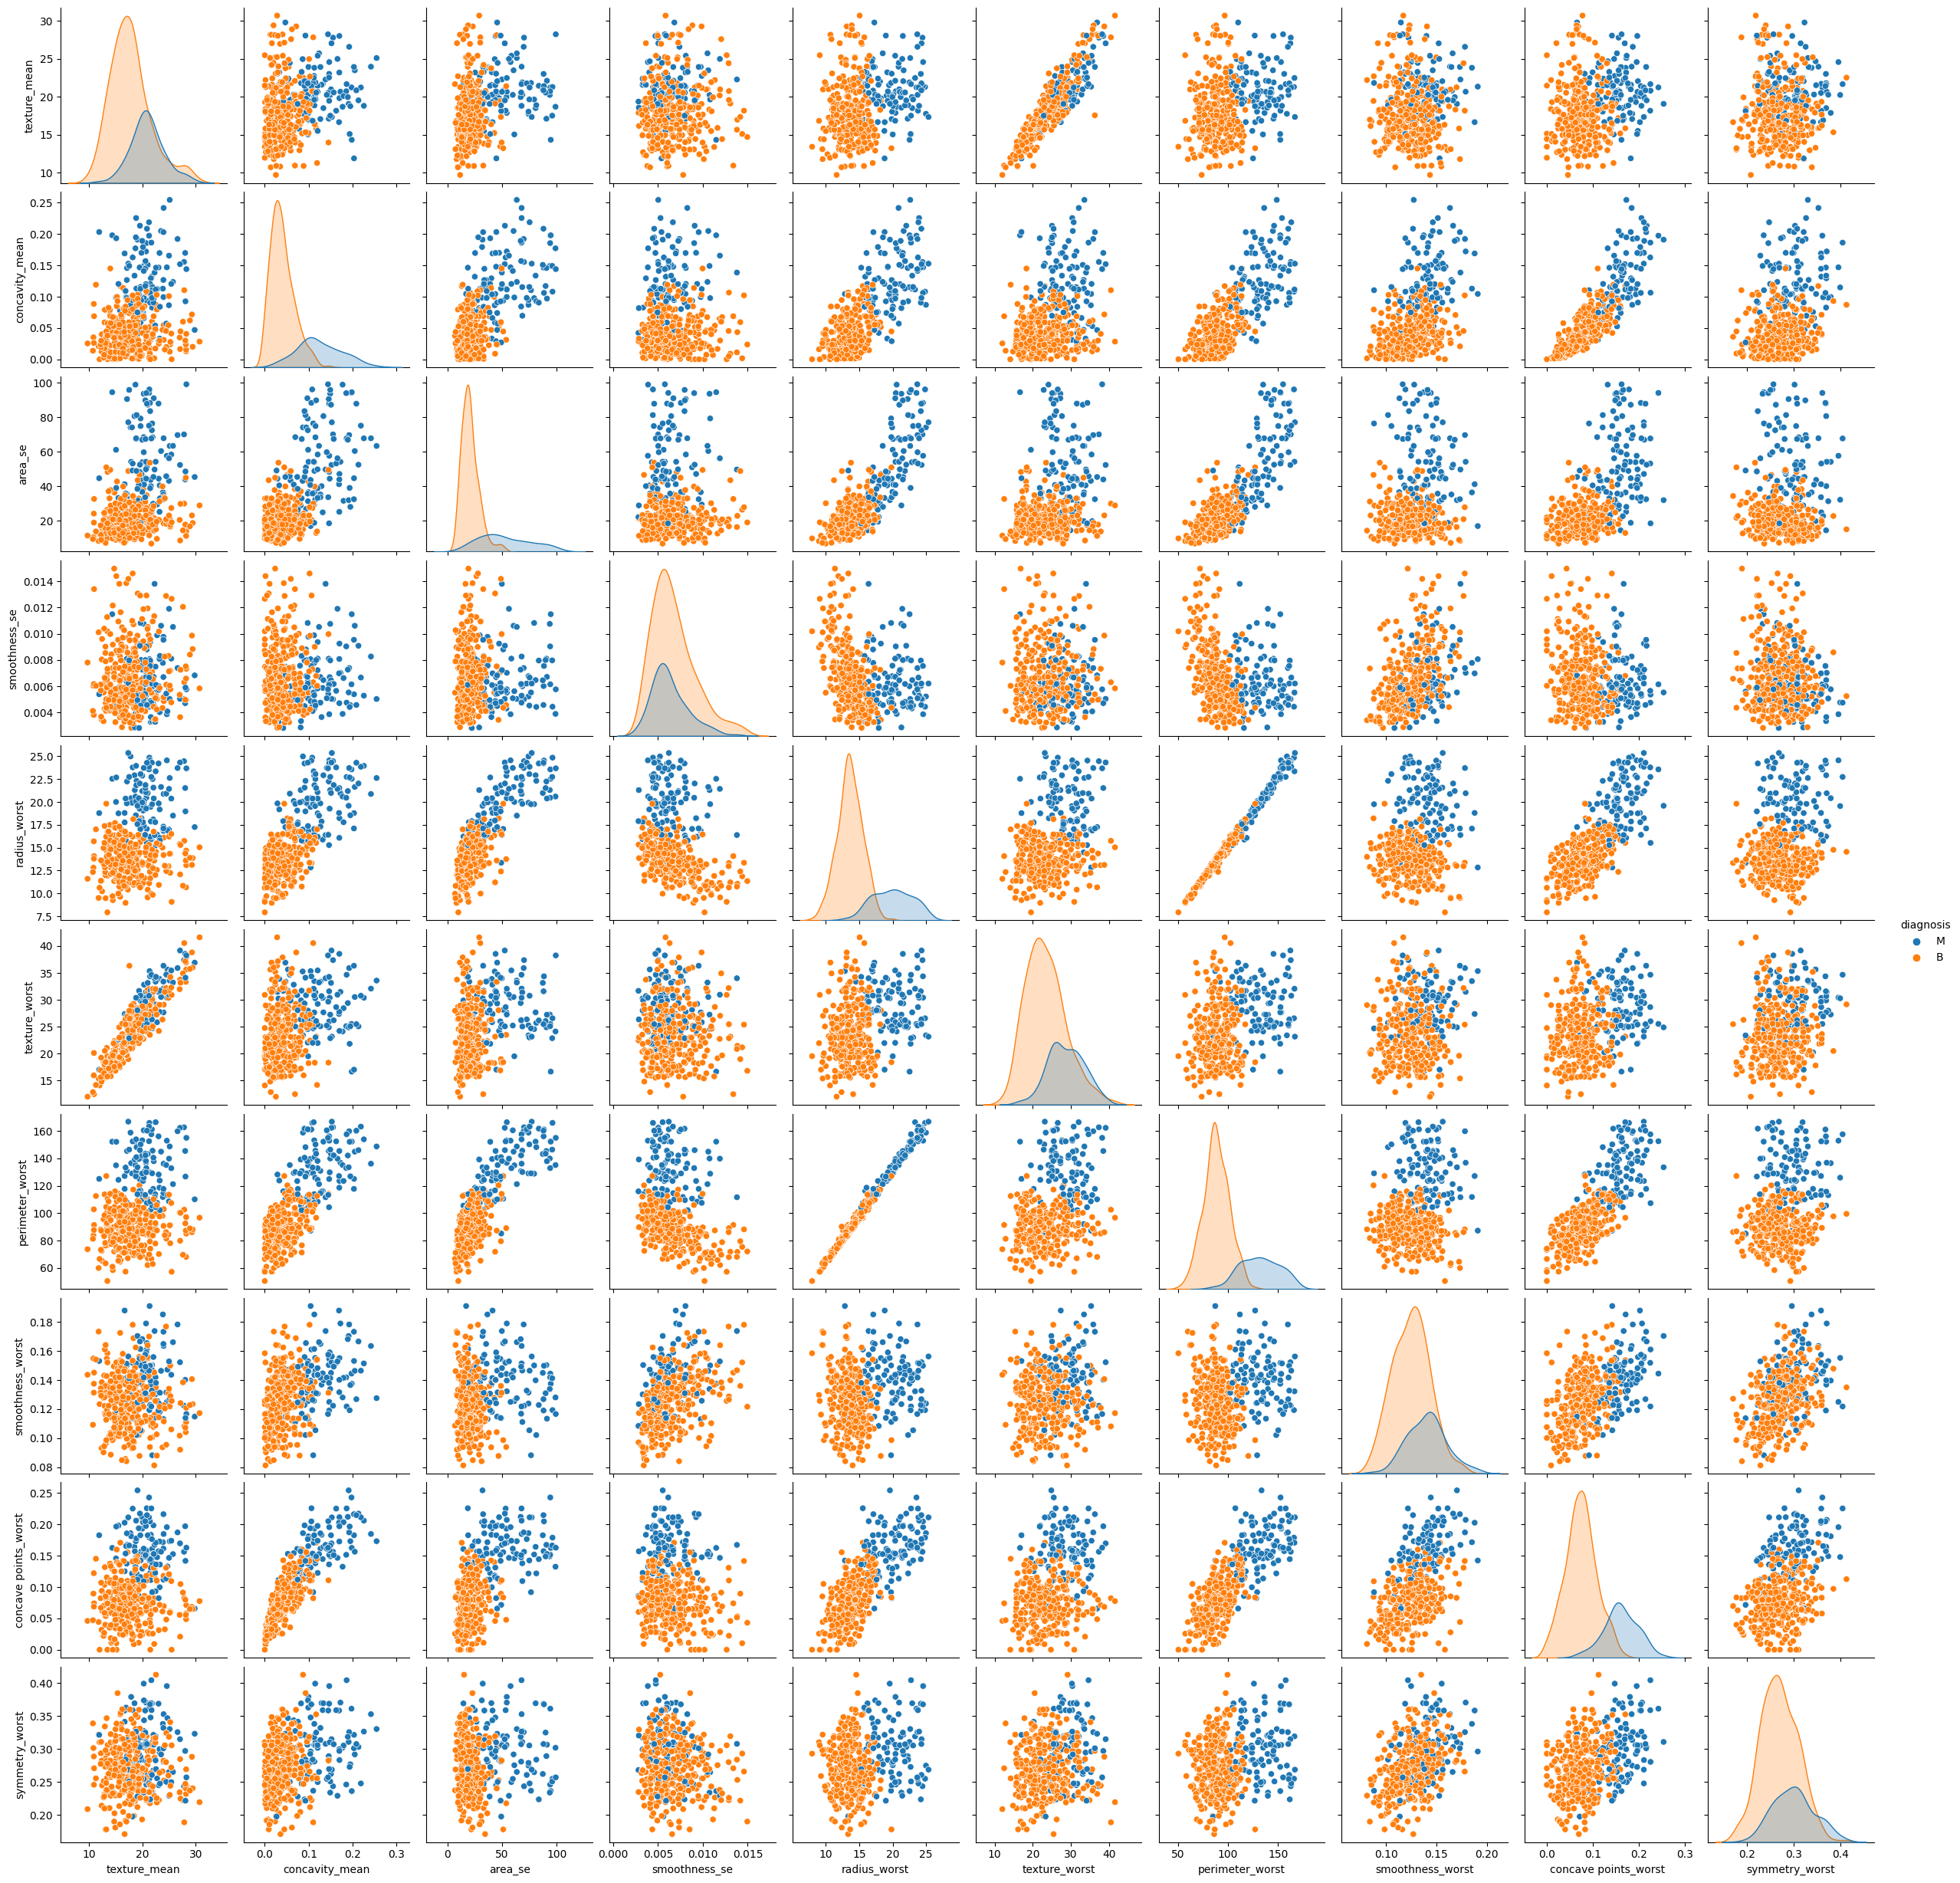

In [15]:
sb.pairplot(df, hue='diagnosis', vars=best_features);

We can see that the most important features are indeed the ones that have the highest correlation with the diagnosis.

In [16]:
# keep only the best features in df
df = pandas.read_csv("dataset_clean.csv", index_col=None)
df = df[['diagnosis']+best_features]

df.head()

diagnosis  texture_mean  concavity_mean  area_se  smoothness_se   
0         M         17.77         0.08690    74.08       0.005225  \
1         M         21.25         0.19740    94.03       0.006150   
2         M         14.34         0.19800    94.44       0.011490   
3         M         19.98         0.11270    53.91       0.004314   
4         M         20.83         0.09366    50.96       0.008805   

   radius_worst  texture_worst  perimeter_worst  smoothness_worst   
0         24.99          23.41            158.8            0.1238  \
1         23.57          25.53            152.5            0.1444   
2         22.54          16.67            152.2            0.1374   
3         22.88          27.66            153.2            0.1442   
4         17.06          28.14            110.6            0.1654   

   concave points_worst  symmetry_worst  
0                0.1860          0.2750  
1                0.2430          0.3613  
2                0.1625          0.2364  
3                0.1932          0.3063  
4                0.1556          0.3196

## 2. Definition of the training and test sets

### 2.1. Splitting the dataset into the Training set and Test set

We'll use 75% of the data for training and 25% for testing.

In [17]:
# Split the data into training and testing sets
all_inputs = df.drop(['diagnosis'], axis=1).values
all_labels = df['diagnosis'].values

# Split the data into training and testing sets
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

### 2.2. Feature Balancing

In [18]:
# TODO: VER DPS

'''
# Use two different methods for balancing the dataset and repeat the previous analyses

# 1. Undersampling

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(all_inputs, all_labels)

(training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.75, random_state=1)

classifier = DecisionTreeClassifier()

classifier.fit(training_inputs, training_classes)

classifier.score(testing_inputs, testing_classes)

testing_predictions = classifier.predict(testing_inputs)

print(classification_report(testing_classes, testing_predictions))

cm = confusion_matrix(testing_classes, testing_predictions)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 2. Oversampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(all_inputs, all_labels)

(training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.75, random_state=1)

classifier = DecisionTreeClassifier()

classifier.fit(training_inputs, training_classes)

classifier.score(testing_inputs, testing_classes)

testing_predictions = classifier.predict(testing_inputs)

print(classification_report(testing_classes, testing_predictions))

cm = confusion_matrix(testing_classes, testing_predictions)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


'''

"\n# Use two different methods for balancing the dataset and repeat the previous analyses\n\n# 1. Undersampling\n\nfrom imblearn.under_sampling import RandomUnderSampler\n\nrus = RandomUnderSampler(random_state=0)\nX_resampled, y_resampled = rus.fit_resample(all_inputs, all_labels)\n\n(training_inputs,\n    testing_inputs,\n    training_classes,\n    testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.75, random_state=1)\n\nclassifier = DecisionTreeClassifier()\n\nclassifier.fit(training_inputs, training_classes)\n\nclassifier.score(testing_inputs, testing_classes)\n\ntesting_predictions = classifier.predict(testing_inputs)\n\nprint(classification_report(testing_classes, testing_predictions))\n\ncm = confusion_matrix(testing_classes, testing_predictions)\n\nplt.matshow(cm)\nplt.title('Confusion matrix')\nplt.colorbar()\nplt.ylabel('True label')\nplt.xlabel('Predicted label')\nplt.show()\n\n# 2. Oversampling\n\nfrom imblearn.over_sampling import RandomOverSampler\n

### 2.3. K-fold Cross Validation

In [19]:
# TODO: make further splits into training and validation sets with k-fold cross validation

'''
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    # Create the classifier
    classifier = DecisionTreeClassifier()

    # Train the classifier on the training set
    classifier.fit(training_inputs, training_classes)

    # Validate the classifier on the testing set using classification accuracy
    model_accuracies.append(classifier.score(testing_inputs, testing_classes))

plt.hist(model_accuracies)










decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores =  cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))









grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')


'''

"\nmodel_accuracies = []\n\nfor repetition in range(1000):\n    (training_inputs,\n     testing_inputs,\n     training_classes,\n     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)\n\n    # Create the classifier\n    classifier = DecisionTreeClassifier()\n\n    # Train the classifier on the training set\n    classifier.fit(training_inputs, training_classes)\n\n    # Validate the classifier on the testing set using classification accuracy\n    model_accuracies.append(classifier.score(testing_inputs, testing_classes))\n\nplt.hist(model_accuracies)\n\n\n\n\n\n\n\n\n\n\ndecision_tree_classifier = DecisionTreeClassifier()\n\n# cross_val_score returns a list of the scores, which we can visualize\n# to get a reasonable estimate of our classifier's performance\ncv_scores =  cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)\nplt.hist(cv_scores)\nplt.title('Average score: {}'.format(np.mean(cv_scores)))\n\n\n\n\n\n\n\n\n\ngrid_visualization = g

## 3. Selection, Parameterization and Evaluation of the learning classification algorithms

### 3.1. Decision Trees

In [20]:
# Create a decision tree classifier
dtc = tree.DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_dtc = GridSearchCV(dtc,
                        param_grid=parameter_grid,
                        cv=cross_validation)

# Train the classifier
grid_dtc.fit(training_inputs, training_classes)


# Print the parameters that gave the best results
print('Best score: {}'.format(grid_dtc.best_score_))
print('Best parameters: {}'.format(grid_dtc.best_params_))

# Store best classifier
best_dtc = grid_dtc.best_estimator_


Best score: 0.94375
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'splitter': 'random'}


In [21]:
# Analyze the accuracy, precision, recall and f-measure achieved. 

testing_predictions = best_dtc.predict(testing_inputs)

print(classification_report(testing_classes, testing_predictions))


              precision    recall  f1-score   support

           B       0.87      1.00      0.93        79
           M       1.00      0.57      0.73        28

    accuracy                           0.89       107
   macro avg       0.93      0.79      0.83       107
weighted avg       0.90      0.89      0.88       107



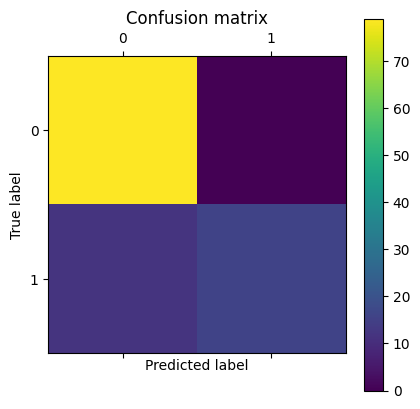

In [22]:
# Print the confusion matrix

# TODO: Ver dps melhor isto

cm = confusion_matrix(testing_classes, testing_predictions)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Let's see the tree.

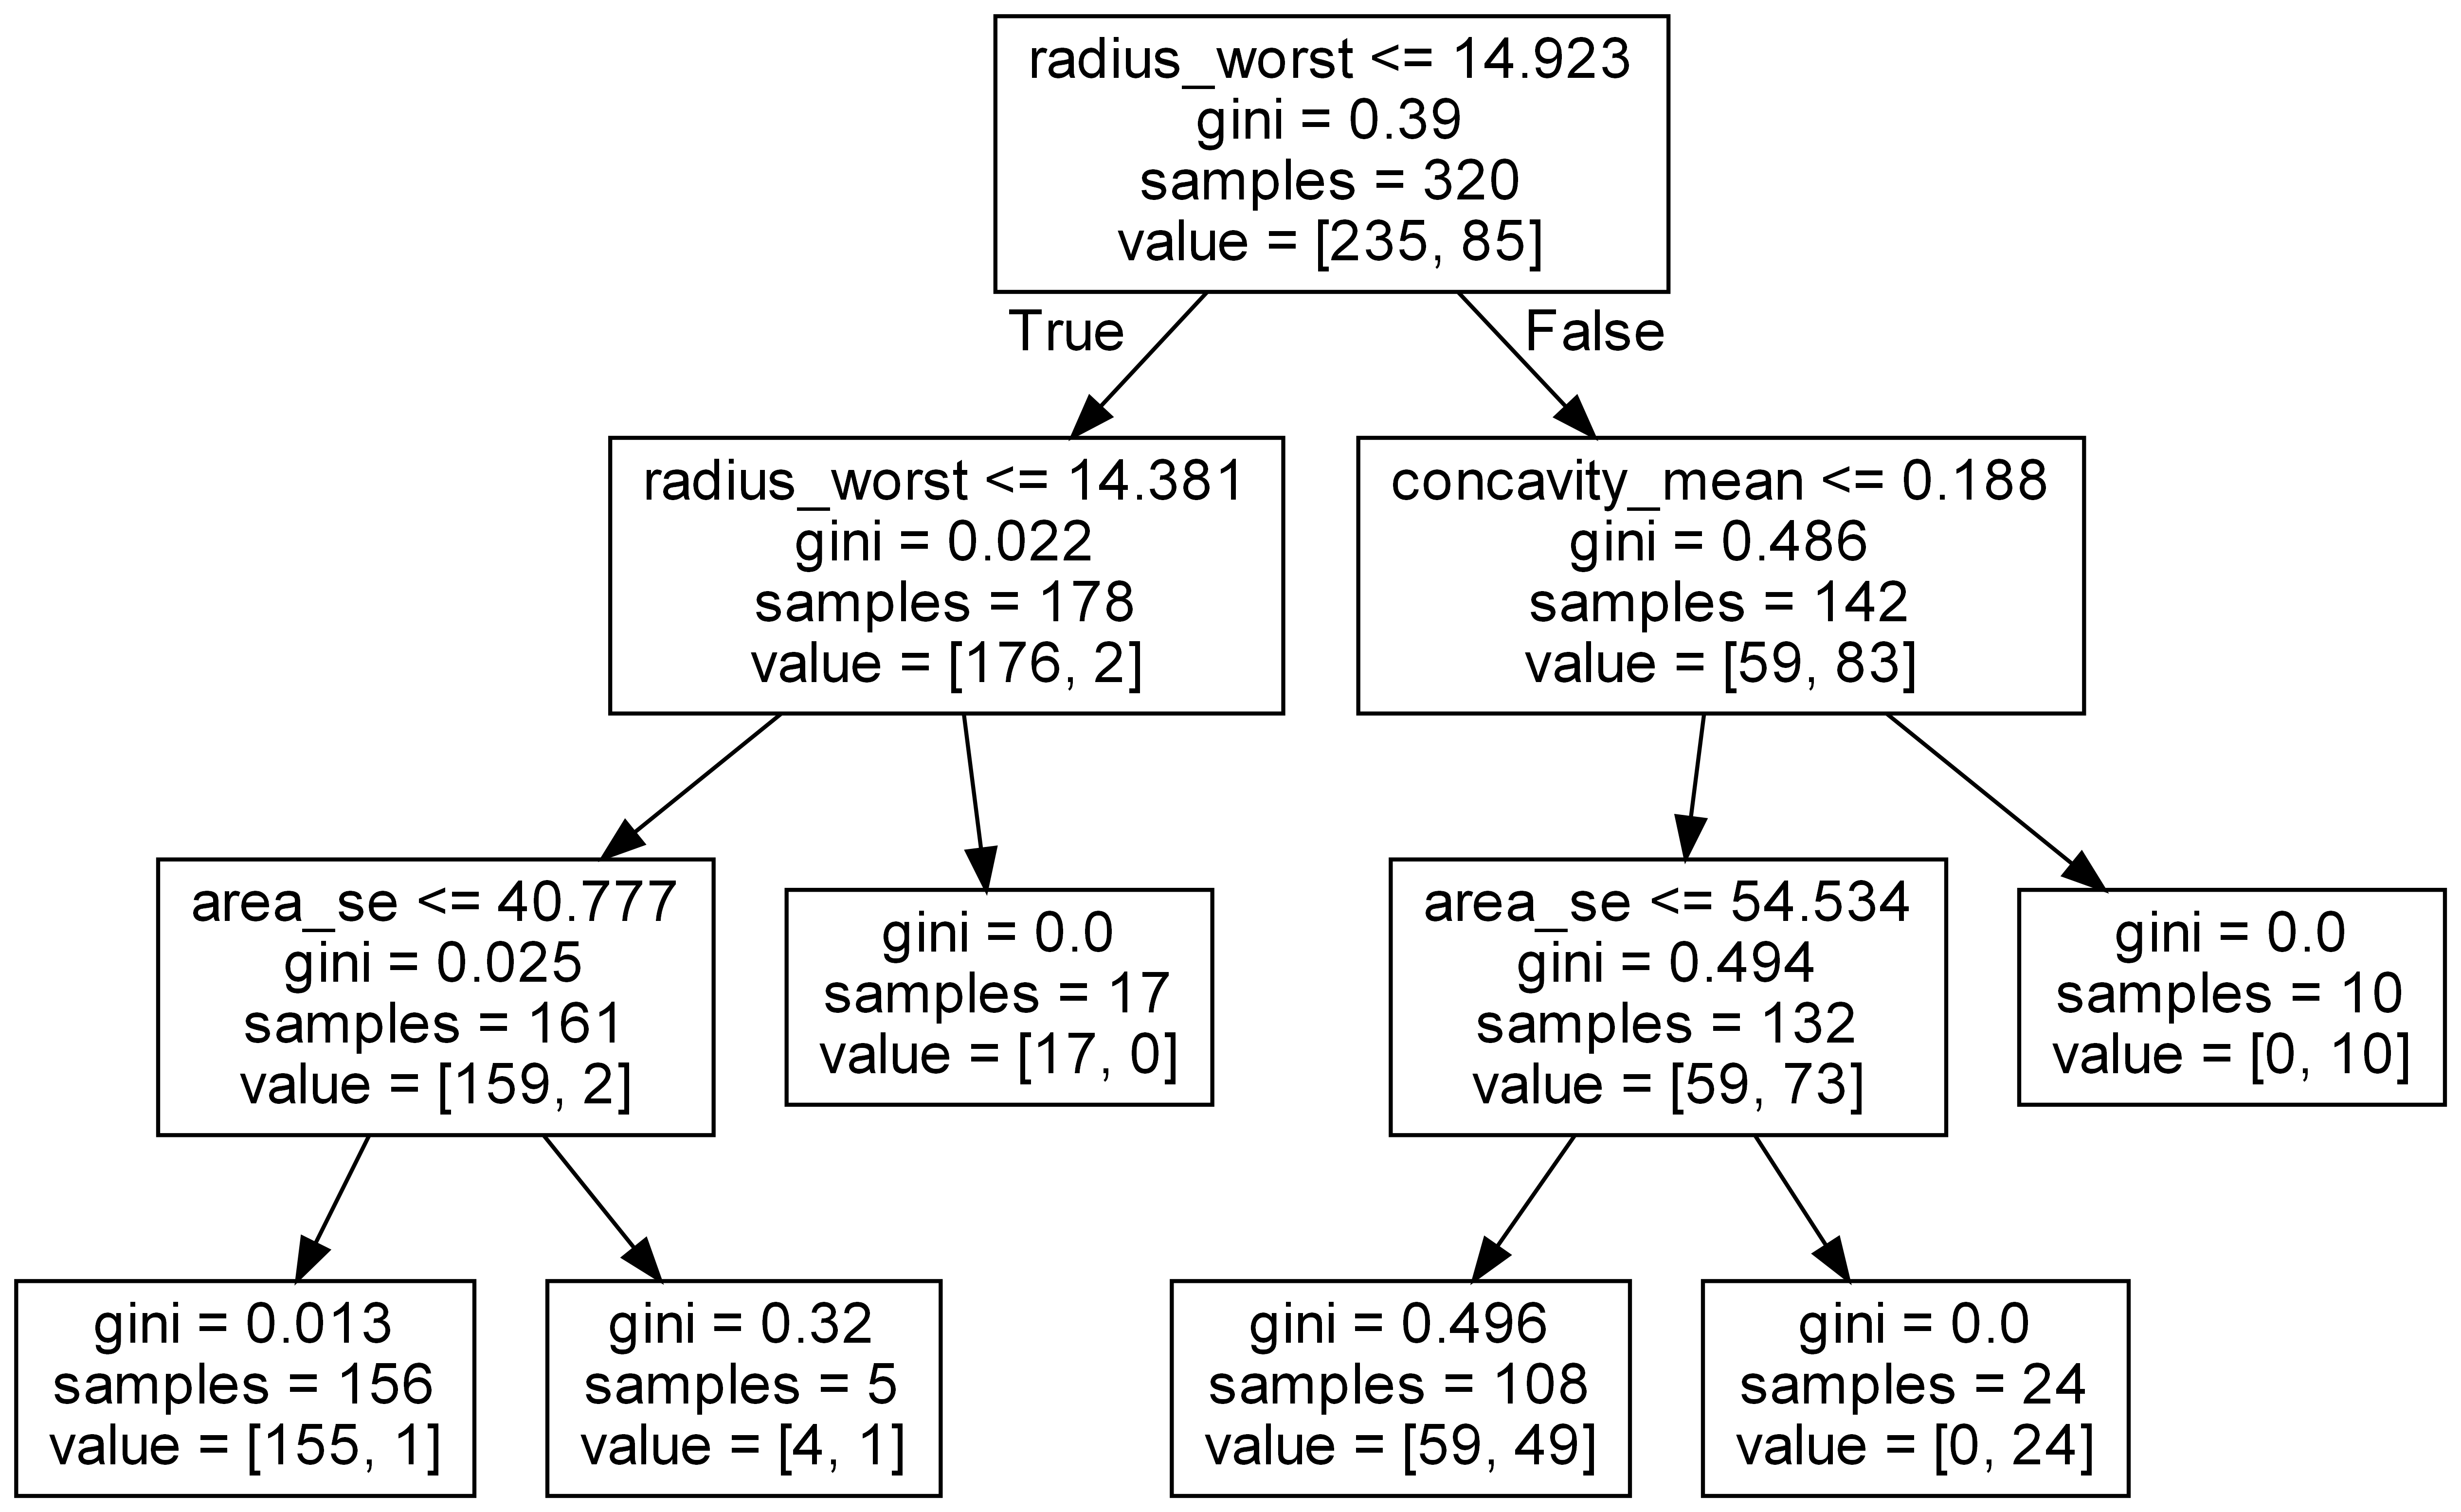

In [23]:
from IPython.display import Image
import sklearn.tree as tree

# Generate a visualization of the tree
tree.export_graphviz(best_dtc, out_file='tree.dot', feature_names=best_features)

# Convert to png
from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']) # requires Linux package graphviz


# Display in jupyter notebook
Image(filename='tree.png', width=1800, height=1800)

The Decision Tree algorithm got a pretty good score! Can we make better with another kind of classifier?

### 3.2. Neural Networks

              precision    recall  f1-score   support

           B       0.93      0.99      0.96        79
           M       0.96      0.79      0.86        28

    accuracy                           0.93       107
   macro avg       0.94      0.89      0.91       107
weighted avg       0.94      0.93      0.93       107



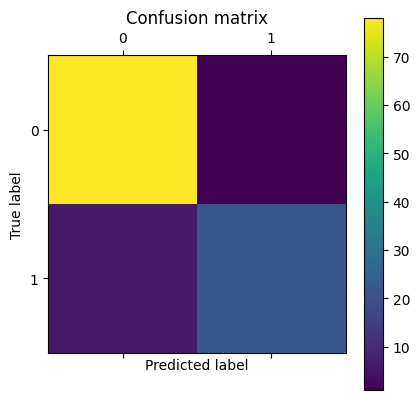

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

# suppress the ConvergenceWarning from the MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

mlp.fit(training_inputs, training_classes)

mlp.score(testing_inputs, testing_classes)

testing_predictions = mlp.predict(testing_inputs)

print(classification_report(testing_classes, testing_predictions))

cm = confusion_matrix(testing_classes, testing_predictions)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
mlp = MLPClassifier(max_iter=200)

parameter_grid = {'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
                  'early_stopping': [True, False]}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(mlp,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8924213406292749
Best parameters: {'early_stopping': False, 'hidden_layer_sizes': (100, 100)}


### 3.3. K-Nearest Neighbors

              precision    recall  f1-score   support

           B       0.98      1.00      0.99        79
           M       1.00      0.93      0.96        28

    accuracy                           0.98       107
   macro avg       0.99      0.96      0.98       107
weighted avg       0.98      0.98      0.98       107



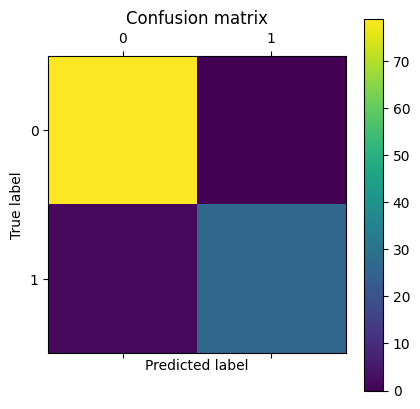

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(training_inputs, training_classes)

knn.score(testing_inputs, testing_classes)

testing_predictions = knn.predict(testing_inputs)

print(classification_report(testing_classes, testing_predictions))

cm = confusion_matrix(testing_classes, testing_predictions)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [27]:
knn = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(knn,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

knn = grid_search.best_estimator_

Best score: 0.9555403556771547
Best parameters: {'n_neighbors': 8}


### 3.4. Support Vector Machines (SVM)

              precision    recall  f1-score   support

           B       0.98      1.00      0.99        79
           M       1.00      0.93      0.96        28

    accuracy                           0.98       107
   macro avg       0.99      0.96      0.98       107
weighted avg       0.98      0.98      0.98       107



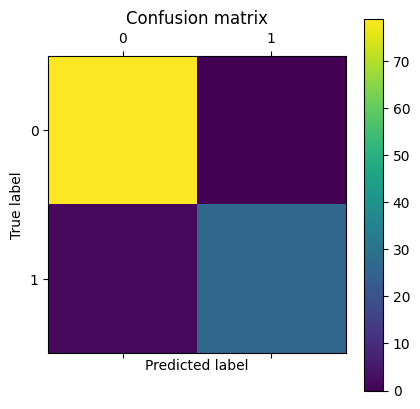

In [28]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(training_inputs, training_classes)

svm.score(testing_inputs, testing_classes)

testing_predictions = svm.predict(testing_inputs)

print(classification_report(testing_classes, testing_predictions))

cm = confusion_matrix(testing_classes, testing_predictions)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
svm = SVC()

parameter_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(svm,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

svm = grid_search.best_estimator_

Best score: 0.9508344733242134
Best parameters: {'C': 1, 'gamma': 0.001}


## 4. Comparison of the results

Taking into account the accuracy, precision, recall and F1 score, the best classifier is the Decision Tree algorithm.